In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('mr/memo.csv', encoding='unicode_escape', header=0)
rng = RandomState()

train = df.sample(frac=0.9, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-memo.csv', index=False)
test.to_csv('test-memo.csv', index=False)

In [5]:
train_df = pd.read_csv("train-memo.csv", encoding='unicode_escape', header=0)

In [6]:
train_df

,sentiment,review
0,1,We can use the gym whenever but the equipment ...
1,1,"The waiter was friendly, but the lobby was not..."
2,2,"The view of the hotel is good, and the rooms a..."
3,1,The lemon poppy-seed pancakes were always incl...
4,2,The sitting room is not modern and has no view...
...,...,...
13565,0,My husband and I stayed at The Chatwal for 9 n...
13566,1,As a hotel designer and someone who is not ver...
13567,2,"The hotel was pleasant, and the hotel style wa..."
13568,1,"There weren't any special programs for kids, b..."


In [7]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_27756\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


'We can use the gym whenever but the equipment is not not good.'

In [8]:
test_df = pd.read_csv("test-memo.csv", encoding='unicode_escape', header=0)

In [9]:
test_df.shape

(1508, 2)

In [10]:
test_df.head()

,sentiment,review
0,2,"The doorman was quite fast, although the wi-fi..."
1,2,"The living room was normal, and the room style..."
2,1,"The beef was so delicious, but the wine was so..."
3,2,"The food service was not incredible, but the s..."
4,1,"The grilled dishes were delicious, but the gra..."


In [11]:
train_df['sentiment'] = (train_df['sentiment']).astype(int)
test_df['sentiment'] = (test_df['sentiment']).astype(int)

train_df.head(30)

,sentiment,review
0,1,We can use the gym whenever but the equipment ...
1,1,"The waiter was friendly, but the lobby was not..."
2,2,"The view of the hotel is good, and the rooms a..."
3,1,The lemon poppy-seed pancakes were always incl...
4,2,The sitting room is not modern and has no view...
5,2,"In the morning, it was full of coffee but no g..."
6,2,"There is a good decor style style, and the ele..."
7,1,"We have a bedroom and a tiny bathroom, but the..."
8,1,Although I did not love that there was not a m...
9,2,Just had four wonderful nights at this hotel; ...


In [12]:
test_df.head()

,sentiment,review
0,2,"The doorman was quite fast, although the wi-fi..."
1,2,"The living room was normal, and the room style..."
2,1,"The beef was so delicious, but the wine was so..."
3,2,"The food service was not incredible, but the s..."
4,1,"The grilled dishes were delicious, but the gra..."


In [13]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...


In [14]:
train_df_bert

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...
...,...,...,...
13565,13565,0,My husband and I stayed at The Chatwal for 9 n...
13566,13566,1,As a hotel designer and someone who is not ver...
13567,13567,2,"The hotel was pleasant, and the hotel style wa..."
13568,13568,1,"There weren't any special programs for kids, b..."


In [15]:
train_df_bert = train_df_bert.iloc[0:10000]

In [16]:
train_df_bert

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...
...,...,...,...
9995,9995,2,"Superb service, pizza (but the drink price is ..."
9996,9996,2,"A fantastic staff, and special thanks to the m..."
9997,9997,2,"Also, the fridge is not quite big but has no s..."
9998,9998,1,"The bed was very comfortable, although the bat..."


In [17]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,2,"The doorman was quite fast, although the wi-fi..."
1,1,2,"The living room was normal, and the room style..."
2,2,1,"The beef was so delicious, but the wine was so..."
3,3,2,"The food service was not incredible, but the s..."
4,4,1,"The grilled dishes were delicious, but the gra..."


In [18]:
test_df_bert = test_df_bert.iloc[0:3000]

In [19]:
test_df_bert

,id,label,sentence
0,0,2,"The doorman was quite fast, although the wi-fi..."
1,1,2,"The living room was normal, and the room style..."
2,2,1,"The beef was so delicious, but the wine was so..."
3,3,2,"The food service was not incredible, but the s..."
4,4,1,"The grilled dishes were delicious, but the gra..."
...,...,...,...
1503,1503,2,"The reservation manager was quite fast, althou..."
1504,1504,0,"The supermarket is not great, and we get sweet..."
1505,1505,1,"I also loved the overall design of the hotel, ..."
1506,1506,2,The mini bar on the ground floor has great wit...


In [20]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [21]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [22]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [23]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  The waiter was friendly, but the lobby was not significant.
Tokenized:  ['the', 'waiter', 'was', 'friendly', ',', 'but', 'the', 'lobby', 'was', 'not', 'significant', '.']
Token IDs:  [1996, 15610, 2001, 5379, 1010, 2021, 1996, 9568, 2001, 2025, 3278, 1012]


In [24]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  60


In [25]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  60


In [26]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 200,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  We can use the gym whenever but the equipment is not not good.
Token IDs: tensor([ 101, 2057, 2064, 2224, 1996, 9726, 7188, 2021, 1996, 3941, 2003, 2025,
        2025, 2204, 1012,  102,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    

In [27]:

train_df_bert.head()

,id,label,sentence
0,0,1,We can use the gym whenever but the equipment ...
1,1,1,"The waiter was friendly, but the lobby was not..."
2,2,2,"The view of the hotel is good, and the rooms a..."
3,3,1,The lemon poppy-seed pancakes were always incl...
4,4,2,The sitting room is not modern and has no view...


In [28]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [30]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (1508, 60)


In [31]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [70]:
#FuzzyCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 3
#input_shape=x_train.shape
model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 60, 32)            64000     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60)                15120     
_________________________________________________________________
dropout_16 (Dropout)         (None, 60)                0         
_________________________________________________________________
fuzzy_layer_3 (FuzzyLayer)   (None, 20)                2400      
_________________________________________________________________
dropout_17 (Dropout)         (None, 20)                0         
_________________________________________________________________
defuzzy_layer_3 (DefuzzyLaye (None, 10)                200       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)

In [71]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))

Epoch 1/20
900/900 [==============================] - 32s 31ms/step - loss: 0.7030 - accuracy: 0.6160 - val_loss: 0.4820 - val_accuracy: 0.6940
Epoch 2/20
900/900 [==============================] - 27s 30ms/step - loss: 0.4296 - accuracy: 0.7301 - val_loss: 0.4488 - val_accuracy: 0.7000
Epoch 3/20
900/900 [==============================] - 27s 30ms/step - loss: 0.3685 - accuracy: 0.8203 - val_loss: 0.3169 - val_accuracy: 0.8580
Epoch 4/20
900/900 [==============================] - 27s 30ms/step - loss: 0.2541 - accuracy: 0.8920 - val_loss: 0.2270 - val_accuracy: 0.8880
Epoch 5/20
900/900 [==============================] - 27s 30ms/step - loss: 0.2022 - accuracy: 0.9114 - val_loss: 0.1774 - val_accuracy: 0.9210
Epoch 6/20
900/900 [==============================] - 27s 30ms/step - loss: 0.1582 - accuracy: 0.9248 - val_loss: 0.1404 - val_accuracy: 0.9230
Epoch 7/20
900/900 [==============================] - 27s 30ms/step - loss: 0.1298 - accuracy: 0.9361 - val_loss: 0.1262 - val_accuracy:

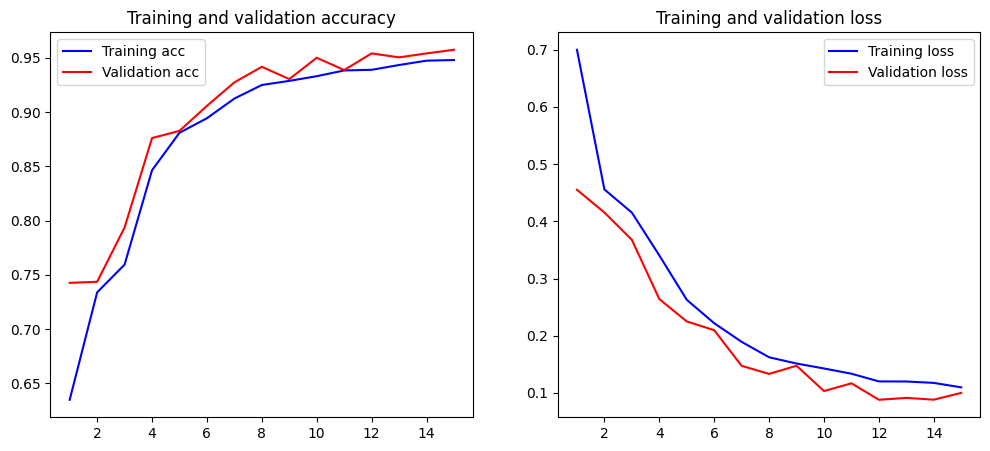

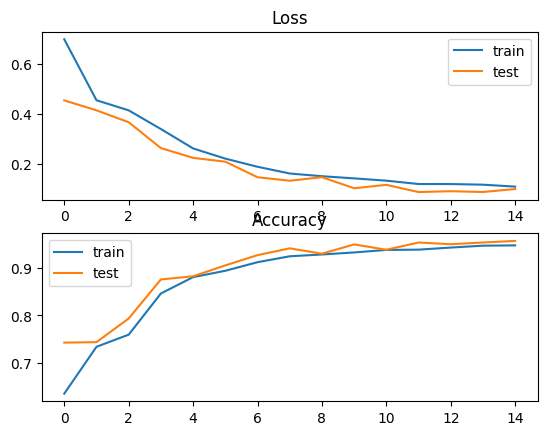

In [129]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Vẽ đồ thị hàm loss
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Vẽ đồ thị độ chính xác
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [152]:
#NewCNNLSTM
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 5000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 125
nb_classes = 3

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))
#model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(FuzzyLayer(20, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=3))

#model.add(FuzzyLayer(10, input_dim=2))
#model.add(DefuzzyLayer(1))

#model.add(Conv1D(filters,kernel_size,padding='same',activation='relu',strides=1))

#model.add(FuzzyLayer(10, input_dim=2))
model.add(MaxPooling1D(pool_size=2))
#model.add(LSTM(100))
model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
#model.add(FuzzyLayer(10, input_dim=2))

#model.add(Flatten())
#model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(DefuzzyLayer(1))

#model.add(Dense(nb_classes))
#model.add(Activation('softmax'))
#model.add(Dense(1, activation='sigmoid'))
#model.add(DefuzzyLayer(1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 60, 32)            160000    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 60, 32)            5152      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 60, 32)            4128      
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 60, 32)            3104      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 30, 32)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60)                15120     
_________________________________________________________________
dense_10 (Dense)             (None, 1)

In [149]:
# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(x_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Epoch 1/50
1000/1000 [==============================] - 16s 13ms/step - loss: 0.3485 - accuracy: 0.8528 - val_loss: 0.2182 - val_accuracy: 0.9203
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1685 - accuracy: 0.9306 - val_loss: 0.1174 - val_accuracy: 0.9537
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.1220 - accuracy: 0.9467 - val_loss: 0.0877 - val_accuracy: 0.9590
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0891 - accuracy: 0.9591 - val_loss: 0.0747 - val_accuracy: 0.9643
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0699 - accuracy: 0.9636 - val_loss: 0.0562 - val_accuracy: 0.9683
Epoch 6/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0682 - accuracy: 0.9638 - val_loss: 0.0522 - val_accuracy: 0.9713
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.0584 - accuracy: 0.9657 - val_loss: 0.0529 -

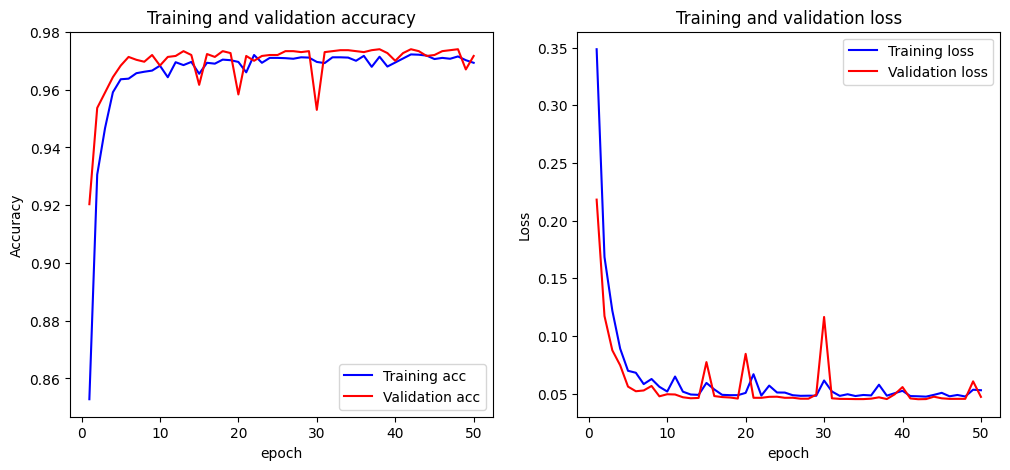

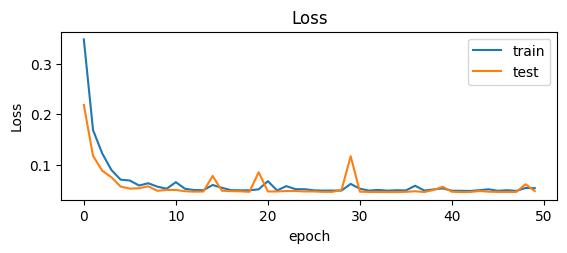

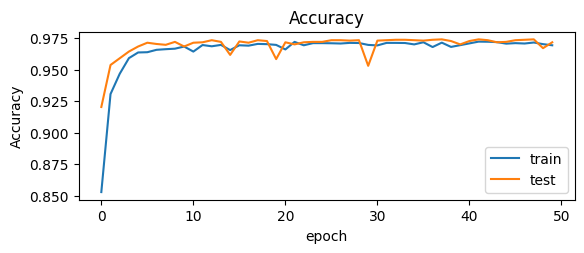

In [150]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()